# María Sofía Álvarez López

## Ajuste lineal de datos

En muchas ocasiones se quiere encontrar la recta que mejor se ajusta a una nube de puntos, por ejemplo, en un espacio de dos dimensiones.
Una forma de lograr esto es medir la distancia en el eje $y$ que existe entre la recta y cada punto de la nube.

In [1]:
#ESAI
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

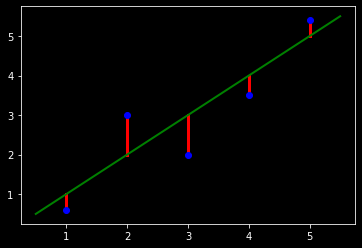

In [2]:
x = [1, 2, 3, 4, 5]
y = [0.6, 3, 2, 3.5, 5.4]

for i in range(len(x)):
    plt.plot([i+1, x[i]],[i+1, y[i]],'r',linewidth=3.0) # dibuja la línea de la distancia en y

plt.plot([0.5, 5.5],[0.5, 5.5], 'g', linewidth=2.0)   # dibuja una línea
plt.plot(x, y, 'bo')     # dibuja puntos
plt.show()

En la figura anterior se muestran en rojo las distancias entre cada punto (en azul) y la recta (en verde). 

Podemos llamar las coordenadas de cada punto azul como ($x_i, y_i$).
Si evaluamos la ecuación de la recta ($y_i'=mx_i+b$) en cada valor $x_i$, obtenemos las coordenadas verticales de los puntos teóricos.
para obtener las distancias (líneas rojas) se hace simplemente la diferencia entre las dos alturas.
$$y'_i - y_i$$
Esta distancia da una medida del error entre el modelo (la línea) y los puntos. Para tener solo cantidades positivas se eleva al cuadrado:
$$(y'_i - y_i)^2$$
si se suman todos los cuadrados tendremos una medida del error total
$$\sum_{i=1}^{i=n}(y'_i - y_i)^2$$
Se desea que el valor del error sea el más pequeño posible por lo que se desea encontrar el valor mínimo de la ecuación anterior. 
Al tratarse de una función cuadrática positiva, el mínimo se puede hallar simplemente derivando respecto a $m$ e igualando a cero y repitiendo el proceso para $b$:

$$\frac{\partial \sum(y'_i - y_i)^2}{\partial m}=0$$
$$\frac{\partial \sum(y'_i - y_i)^2}{\partial b}=0$$
Sustituyendo a $y_i'$
$$\frac{\partial \sum(mx_i+b - y_i)^2}{\partial m}=0$$
$$\frac{\partial \sum(mx_i+b - y_i)^{2}}{\partial b}=0$$
Con esto se obtiene
$$\sum_{i=1}^{n} y_i = nb+ m\sum_{i=1}^n x_i$$
$$\sum_{i=1}^{n} x_iy_i = b\sum_{i=1}^{n}+ m\sum_{i=1}^n x_i^2$$
Resolviendo para $m$ y $b$ se tiene
$$m = \frac{\sum x_iy_i-\frac{1}{n}\sum x_i \sum y_i}{\sum x_i^2 - \frac{1}{n}\left(\sum x_i\right)^2}$$

$$b = \frac{1}{n}\sum y_i - \frac{m}{n}\sum x_i$$

A continuación, se muestra un ejemplo de implementación de estas ecuaciones:

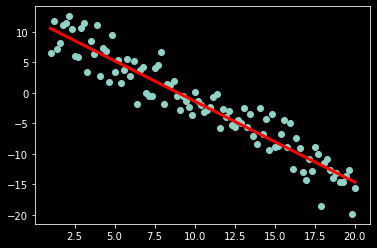

In [3]:
pts = 100
amp = 2

x = np.linspace(1, 20, pts).reshape(-1,1)
y = np.random.randn()*(amp*np.random.randn(pts,1) + x) + np.random.randn()*10

sumx = np.sum(x)
sumy = np.sum(y)
m = (np.sum(x*y) - (sumx*sumy)/pts)/(np.sum(x*x) - (sumx**2)/pts)
b = (sumy - m*sumx)/pts

plt.plot(x, y, 'o')
plt.plot([x[0], x[-1]], [m*x[0] + b, m*x[-1] + b], 'r', linewidth=3)
plt.show()

## Ajuste lineal (método matricial)


Supongamos que tenemos un sistema inconsistente de ecuaciones que no cumplen

$$\textbf{P}\vec v = \vec y$$

o escrito de forma más explicita 

$$\begin{bmatrix}
1 && x_1\\ 
1 && x_2\\ 
\vdots && \vdots\\ 
1 && x_n
\end{bmatrix}
\begin{bmatrix}
a\\ 
b\\ 
\end{bmatrix}=\begin{bmatrix}
y_1\\ 
y_2\\ 
\vdots \\ 
y_n
\end{bmatrix}$$

de forma que $\vec y$ no se encuentra en el espacio columna de $\textbf{P}$. Sin embargo, la proyección del vector $\vec y$ sobre el espacio columna de $\textbf{P}$ se corresponde con la menor distancia entre dicho espacio y $\vec y$. Entonces para minimizar esta distancia
$$\left \| \vec y - \textbf{P}\vec v^{*} \right \|$$
se tiene que $$\textbf{P}\vec v^{*} = \text{Proy}_{C(\textbf{P})}\vec y$$ 
al restar $\vec y$ a cada lado de la igualdad obtenemos un vector que es ortogonal al espacio columna de $\textbf{P}$ 

$$\textbf{P}\vec v^{*}-\vec y = \text{Proy}_{C(\textbf{P})}\vec y - \vec y$$ 
Es decir $\textbf{P}\vec v^{*}-\vec y \in C(P)^{\perp}$.
Teniendo en cuenta que este espacio ortogonal es el espacio izquierdo nulo de $\textbf{P}^{\perp}$, que se nota como $N(\textbf P^{\intercal})$
$$C(P)^{\perp} = N(\textbf P^{\intercal})$$
Entonces
$$\textbf{P}\vec v^{*}-\vec y \in N(\textbf P^{\intercal})$$
Al estar $\textbf{P}\vec v^{*}-\vec y$ en $N(\textbf P^{\intercal})$ significa que si se multiplica por izquierda por $\textbf P^{\intercal}$ nos dará como resultado el vector cero.
$$\textbf P^{\intercal}(\textbf{P}\vec v^{*}-\vec y)=\vec 0$$
Distribuyendo
$$\textbf P^{\intercal}\textbf{P}\vec v^{*}-\textbf P^{\intercal}\vec y=\vec 0$$
Sumando $\textbf P^{\intercal}\vec y$ en ambos extremos de la igualdad
$$\textbf P^{\intercal}\textbf{P}\vec v^{*}=\textbf P^{\intercal}\vec y$$
Multiplicando ambos extremos por izquierda por $(\textbf P^{\intercal}\textbf{P})^{-1}$ y simplificando se tiene
$$\vec v^{*}=(\textbf P^{\intercal}\textbf{P})^{-1}\textbf P^{\intercal}\vec y$$
Así hemos encontrado los parámetros que minimizan la distancia $\left \| \vec y - \textbf{P}\vec v^{*} \right \|$, los componentes de $\vec v^*$ son coeficientes del ajuste buscado.

Veamos un ejemplo en un espacio de 2 dimensiones en Python:

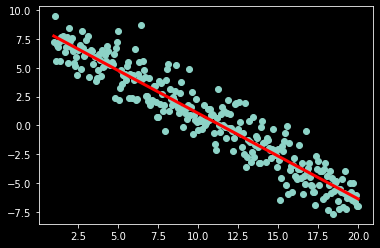

In [4]:
pts = 300
amp = 2

x = np.linspace(1, 20, pts).reshape(-1,1)
y = np.random.randn()*(amp*np.random.randn(pts,1) + x) + np.random.randn()*10

#Construimos P
P = np.array([np.ones([pts, 1]), x]).reshape(2,pts).T
v = (np.linalg.inv(P.T @ P) @ P.T) @ y
b, m = v

plt.plot(x, y, 'o')
plt.plot([x[0], x[-1]], [m*x[0] + b, m*x[-1] + b], 'r', linewidth=3)
plt.show()

## Solución de sistemas de ecuaciones lineales por eliminación gaussiana

Ejemplo:

El sistema de 3 ecuaciones con 3 incognitas

$$      \begin{array}{rrrcr}
          2x & + y &   -z & = &   8 \\
         -3x & - y & + 2z & = & -11 \\
         -2x & + y & + 2z & = &  -3
      \end{array}$$

se puede representar con la siguiente matriz aumentada:

$$   \left (
      \begin{array}{rrr:r}
          2 &  1 & -1 &   8 \\
         -3 & -1 &  2 & -11 \\
         -2 &  1 &  2 &  -3
      \end{array}
   \right )$$

sumando a la segunda fila, la primera multiplicada por $\frac{3}{2}$, y a la tercera, la primera fila:
$$   \left (
      \begin{array}{rrr:r}
         2 & 1           & -1          & 8 \\
         0 & \frac{1}{2} & \frac{1}{2} & 1 \\
         0 & 2           & 1           & 5 
      \end{array}
   \right )$$

In [5]:
def triangular_superior(A):
    B = A.copy().astype(float)
    n = B.shape[0]
    for i in range(n):
        for j in range(i+1, n):
            B[j] = (B[j,i]/B[i,i])*B[i] - B[j]
    return B

def matriz_diagonal(A_t):
    B = A_t.copy().astype(float)
    n = B.shape[0]
    for i in range(n-1, -1, -1):
        for j in range(i-1, -1, -1):
            B[j] = (B[j,i]/B[i,i])*B[i] - B[j]
        B[i] = B[i]/B[i,i]
    return B

In [6]:
A = np.array([
    [2, 1, -1, 8],
    [-3, -1, 2, -11],
    [-2, 1, 2, -3]
])
A_t = triangular_superior(A)
D = matriz_diagonal(A_t)
print(D)
solucion = D[:,-1]
print(solucion)
#Verificamos que x,y,z que nos dio efectivamente son
print('Comprobar solucion')
print(A[:,0:-1] @ solucion)

[[ 1.  0. -0.  2.]
 [ 0.  1.  0.  3.]
 [-0. -0.  1. -1.]]
[ 2.  3. -1.]
Comprobar solucion
[  8. -11.  -3.]


## Eliminación gaussiana con pivoteo parcial

El sistema de 3 ecuaciones con 3 incognitas

$$      \begin{array}{rrrcr}
           & - 2y &   -z & = &   -14 \\
         2x & + 3y & + z & = & 1 \\
         3x & + y & - z & = & 1
      \end{array}$$

se puede representar con la siguiente matriz aumentada:

$$   \left (
      \begin{array}{rrr:r}
          0 & -2 & -1 & -14 \\
          2 &  3 &  1 &   1 \\
          3 &  1 & -1 &   1
      \end{array}
   \right )$$

In [7]:
def triangular_superior(A):
    B = A.copy().astype(float)
    n = B.shape[0]
    for i in range(n):
        indi_max = np.argmax(np.abs(B[i:,i]))
        if indi_max > 0:
            C = B[i].copy()
            B[i] = B[i+indi_max]
            B[i+indi_max] = C
        for j in range(i+1, n):
            B[j] = (B[j,i]/B[i,i])*B[i] - B[j]
    return B

In [8]:
A = np.array([
    [0, -2, -1, -14],
    [2, 3, 1, 1],
    [3, 1, -1, 1], 
])

A_t = triangular_superior(A)
D = matriz_diagonal(A_t)
print(D)
solucion = D[:,-1]
print(solucion)
#Verificamos que x,y,z que nos dio efectivamente son
print('Comprobar solucion')
print(A[:,0:-1] @ solucion)

[[  1.   0.  -0. -18.]
 [  0.   1.   0.  23.]
 [ -0.   0.   1. -32.]]
[-18.  23. -32.]
Comprobar solucion
[-14.   1.   1.]


## Inversión de matrices usando eliminación gaussiana

Dada una matriz $A$ es posible encontrar su inversa haciendo eliminación gaussiana sobre la matriz $A$ y copiando cada operación sobre la matriz identidad.

Ejemplo: Encontrar la inversa de $A$

$$A=   \left (
      \begin{array}{rrr}
          2 &  1 &  3  \\
         -1 &  2 &  4 \\
          0 &  1 &  3 
      \end{array}
   \right )$$

   $$\left (
      \begin{array}{rrr:rrr}
          2 &  1 &  3 & 1 & 0 & 0 \\
         -1 &  2 &  4 & 0 & 1 & 0\\
          0 &  1 &  3 & 0 & 0 & 1
      \end{array}
   \right )$$


In [9]:
A = np.array([
    [0, -2, -1],
    [2, 3, 1],
    [3, 1, -1], 
])

def matriz_inversa(A):
    M_identidad = np.identity(A.shape[0])
    B = np.concatenate((A, M_identidad), axis=1)
    B_t = triangular_superior(B)
    D = matriz_diagonal(B_t)
    return D[:, A.shape[0]:]
    
inversa = matriz_inversa(A)
print(inversa)
print(np.round(inversa @ A, 14))

[[ 1.33333333  1.         -0.33333333]
 [-1.66666667 -1.          0.66666667]
 [ 2.33333333  2.         -1.33333333]]
[[ 1. -0.  0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
